# Airbnb Project

### Overview:

(*Olga specifically asked me to try to fomulate some potential business questions based on the data set, this can be find under ad title name **Some Simple Analytic Proposals**, if you want to speed to that part, keep scrolling*)

Other than that the project is structured as:

**1. Data - I look over the data set and decided what variables to keep**

**2. EDA - mostly investigated relationships with prices**
    - along with some slight feature engineering (created a new variable relative distance)
    
**3. Some Simple Analytic Proposals - proposed some possible directions to analyze the data further**

**4. Machine Learning**

(*It's not as tidy as I want to be, but running out of time, so apologies*)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")

### Data

[Data Source: Inside Airbnb](http://insideairbnb.com/get-the-data.html)

In [5]:
df = pd.read_csv("listings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20677 entries, 0 to 20676
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.7+ MB


C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
col_list = list(df.columns)

In [7]:
# View first 20 columns
df[col_list[0:20]].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,"However, our good friends who live close by ta...","The building is a quiet building, so please do...",NaN,NaN,https://a0.muscache.com/im/pictures/138431/707...,NaN,56142
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared","As much as they want, and is possible. I speak...","All the facilities are included ( cleaning , ...",NaN,NaN,https://a0.muscache.com/im/pictures/02c2da9d-6...,NaN,97647
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/160889/362...,NaN,124245


In [6]:
# view next 20 columns
df[col_list[21:41]].head()

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN
1,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,NaN
2,Joan,2009-11-20,"New York, New York, United States","We are a retired couple who live in NYC, and h...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,NaN
3,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,NaN
4,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",Hi,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/9986bbdb-6...,https://a0.muscache.com/im/pictures/9986bbdb-6...,Amsterdam Centrum,3.0,3.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"Amsterdam, North Holland, Netherlands",Amsterdam Centrum,Centrum-West,NaN


In [7]:
# next 20 columns
df[col_list[41:61]].head()

,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price
0,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00
1,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36509,4.89354,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",NaN,$80.00
2,Amsterdam,North Holland,1016,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.37297,4.88339,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",NaN,$125.00
3,Amsterdam,North Holland,1013,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.38673,4.89208,t,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",NaN,$150.00
4,Amsterdam,North Holland,1017,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36719,4.89092,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Pets live on this property"",Ca...",NaN,$75.00


In [8]:
# next 20 columns
df[col_list[61:81]].head()

,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365
0,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89
1,NaN,NaN,NaN,NaN,2,$0.00,1,1000,1,4,1000,1000,3.4,1000.0,today,t,0,8,34,124
2,$650.00,"$2,000.00",$300.00,$40.00,2,$10.00,14,60,14,14,60,60,14.0,60.0,today,t,4,6,16,75
3,$810.00,"$2,500.00",$0.00,$0.00,1,$0.00,2,730,2,2,730,730,2.0,730.0,today,t,6,13,26,66
4,$499.00,"$1,956.00",NaN,NaN,1,$0.00,2,1825,2,2,1825,1825,2.0,1825.0,3 days ago,t,2,5,12,138


In [9]:
# next 20 columns
df[col_list[81:101]].head()

,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f
1,2019-08-09,283,67,2010-03-02,2019-07-26,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f
2,2019-08-09,3,2,2018-01-21,2019-05-11,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,strict_14_with_grace_period,f,f
3,2019-08-09,195,41,2012-01-09,2019-07-01,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f
4,2019-08-09,283,99,2010-08-22,2019-07-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",f,f,moderate,f,f


In [10]:
# last couple columns
df[col_list[101:]].head()

,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1,0,1,0,2.12
1,2,0,2,0,2.46
2,2,2,0,0,0.16
3,1,0,1,0,2.11
4,3,0,3,0,2.59


**Drop columns, based on personal interest and intuition**

(*Intuition meaning personal judgement of whether the variable can provide good insights or capture variance well*)

In [11]:
# drop columns, based on personal interest
col_drop = {"listing_url", "host_url", "scrape_id", "last_scraped", "id", "experiences_offered","thumbnail_url", "medium_url", 
            "picture_url", "xl_picture_url", "host_id", "host_name", "host_acceptance_rate", "host_thumbnail_url", 
            "host_thumbnail_url", "host_verifications", "neighbourhood_cleansed", "neighbourhood_group_cleansed", 
            "extra_people", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", 
            "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calendar_last_scraped", 
            "first_review", "last_review", "requires_license", "is_business_travel_ready", 
            "calculated_host_listings_count","calculated_host_listings_count_entire_homes", 
            "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", 
            "host_picture_url", "is_location_exact", 'license', "jurisdiction_names", "weekly_price", "monthly_price",
           "security_deposit", "host_location", "market", "host_neighbourhood", "street", "smart_location", "country",
           "country_code", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "calendar_updated", 
           "has_availability", "number_of_reviews_ltm", "require_guest_profile_picture", "require_guest_phone_verification",
           "host_has_profile_pic", "city", "state", "zipcode", "host_response_rate"}

df2 = df.drop(columns=col_drop)

Some variables in df2 are long strings that can be used for text analysis, NLP and sentiment analysis, but let's create df3, one without these variables - for exploring other variables first (because it is an easier step)

In [12]:
# now also drop the columns for natural language processing for now
col_drop_np = ["name", "summary", "neighborhood_overview", "notes", "transit", "access", "interaction", "house_rules", 
               "host_about", "amenities", "description", "space"]
df3 = df2.drop(columns=col_drop_np)

In [13]:
df3.shape

(20677, 36)

In [14]:
df3.columns

Index(['host_since', 'host_response_time', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'square_feet', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

In [15]:
pd.set_option('display.max_columns', 999)
df3.head()

,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,2008-09-24,within an hour,t,1.0,1.0,f,Indische Buurt,52.36575,4.94142,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,NaN,$59.00,1,3,15,8,18,43,89,267,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,2.12
1,2009-12-02,within an hour,f,2.0,2.0,f,Grachtengordel,52.36509,4.89354,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$80.00,2,1,1000,0,8,34,124,283,88.0,9.0,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,2.46
2,2009-11-20,within an hour,f,2.0,2.0,f,Grachtengordel,52.37297,4.88339,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,NaN,$125.00,2,14,60,4,6,16,75,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,0.16
3,2010-03-23,within an hour,t,1.0,1.0,t,Westelijke Eilanden,52.38673,4.89208,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$150.00,1,2,730,6,13,26,66,195,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,2.11
4,2010-05-13,within an hour,t,3.0,3.0,t,Amsterdam Centrum,52.36719,4.89092,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,$75.00,1,2,1825,2,5,12,138,283,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,2.59


### Missing Values

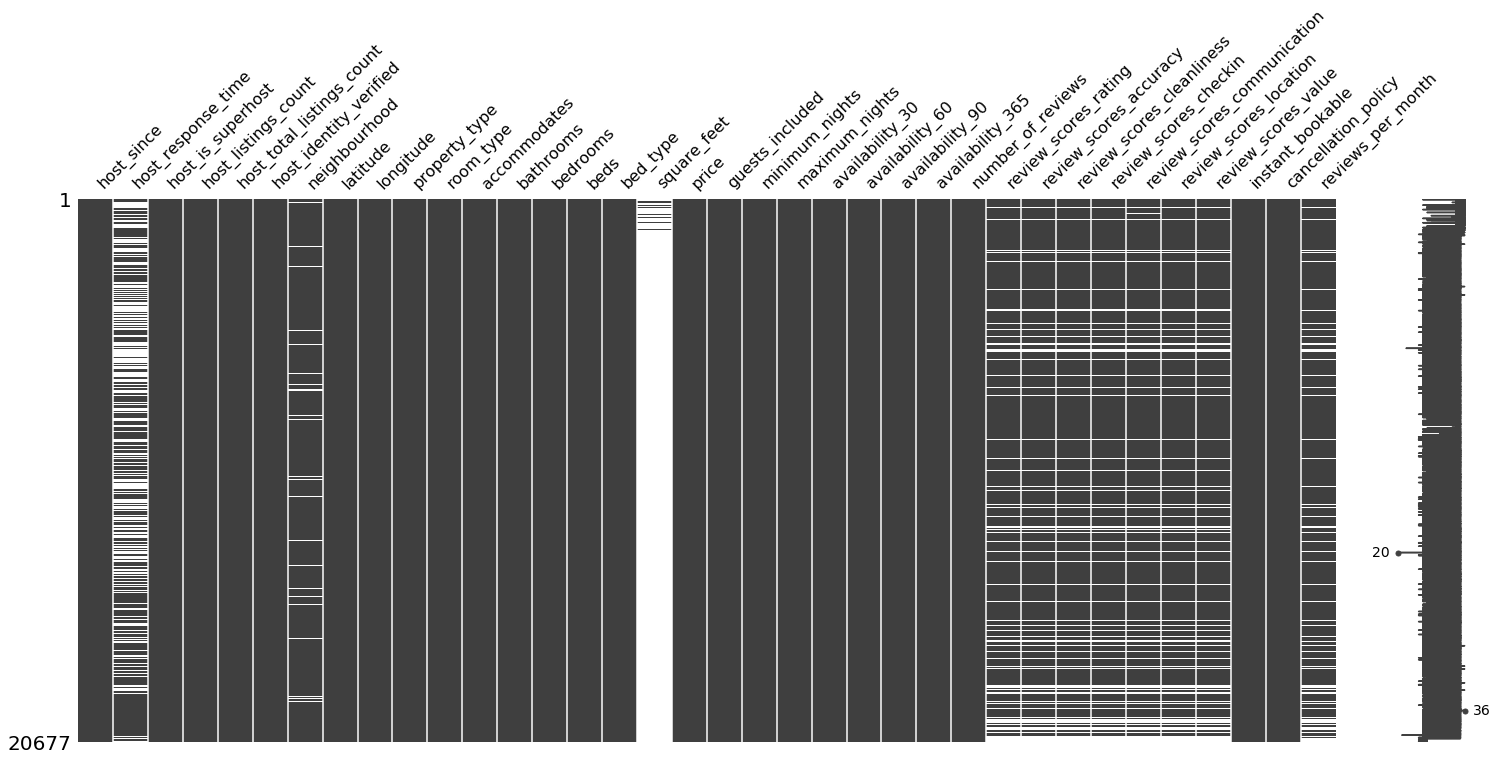

In [16]:
import missingno as mn
mn.matrix(df3)

According to the graph, some columns, such as host_response_time, host_response_rate,square_feed are **missing many values**,
remove columns with more than 25% of missing values 

(*note: that was an more or less arbitrary decision based on [this post](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456) on the first answer, I don't know how to make a better informed decision yet*)

In [17]:
df3.dropna(thresh=20677*.25, axis = 1, inplace=True)

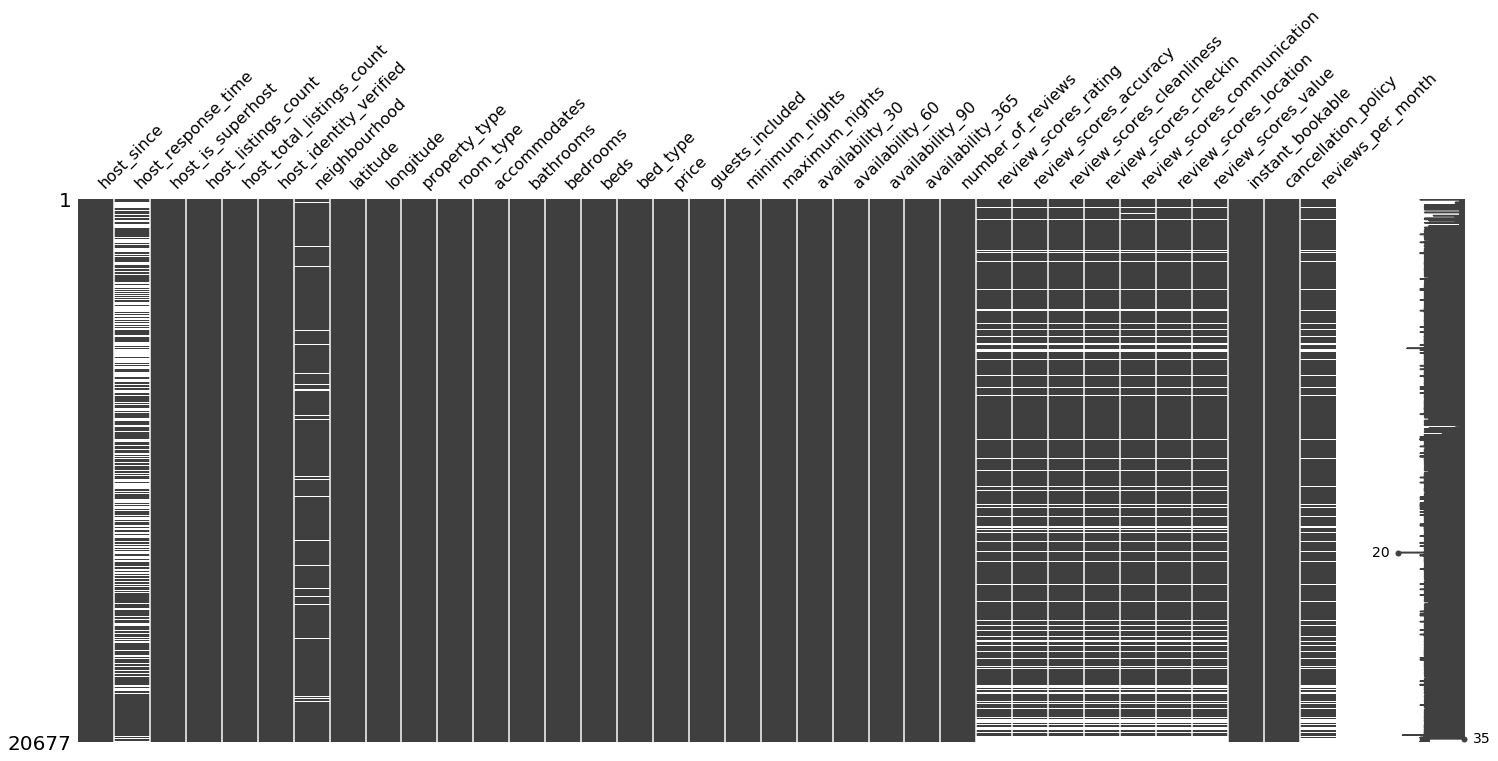

In [18]:
mn.matrix(df3)

## EDA (primarily on variables' relationship with daily price)

In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

# for notebooks
init_notebook_mode(connected=True)

# for offline use
cf.go_offline()

In [20]:
# first convert price 
df3["price"] = df3["price"].apply(lambda x: x.strip("$"))
df3["price"] = df3["price"].apply(lambda x: float(x.replace(",","")))

(0, 600)

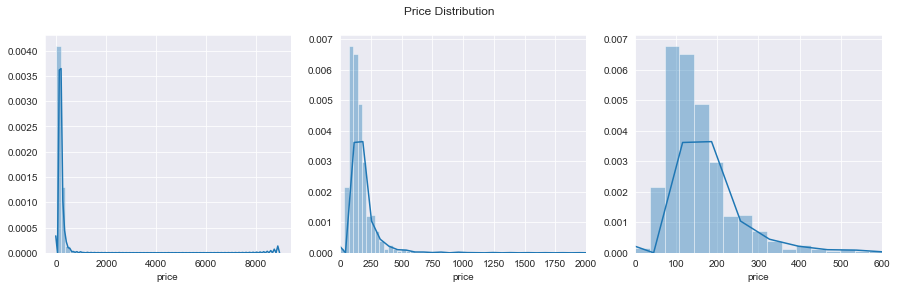

In [115]:
fig, ax = plt.subplots(1,3, figsize = (15,4))
plt.suptitle("Price Distribution")
sns.distplot(df3["price"], hist_kws=dict(edgecolor = "white"), bins = 50, ax=ax[0])
sns.distplot(df3["price"], hist_kws=dict(edgecolor = "white"), bins = 250, ax=ax[1])
ax[1].set_xlim([0,2000])
sns.distplot(df3["price"], hist_kws=dict(edgecolor = "white"), bins = 250, ax=ax[2])
ax[2].set_xlim([0,600])

Text(0.5, 1.0, 'Pricing box plot')

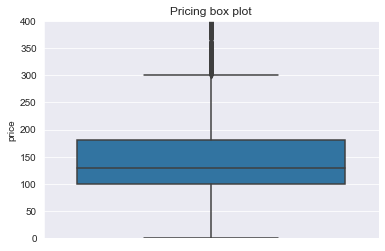

In [118]:
sns.boxplot(df3["price"], orient="v")
plt.ylim([0,400])
plt.title("Pricing box plot")

Maybe need to drop outliers, but what to set as the threshold?

In [23]:
sum(df3["price"]>300)/df3.shape[0]

0.054505005561735265

about 5% is above $300

In [24]:
sum(df3["price"]>500)/df3.shape[0]

0.01228418049039996

about 1% is above $500

In [25]:
# convert to datetime
df3["host_since"] = pd.to_datetime(df3["host_since"])

### Host Experience vs. Price

In [26]:
df3["year"] = df3["host_since"].apply(lambda x: x.year)
df3["year"].value_counts()

2014.0    4043
2015.0    3525
2016.0    3288
2013.0    3287
2012.0    1873
2017.0    1724
2018.0    1303
2019.0     757
2011.0     695
2010.0     150
2009.0      18
2008.0       2
Name: year, dtype: int64

The most recent year is 2019, *2019 - host_ since* will be use as a measure of host experience 

### Experience (in years) as host vs price

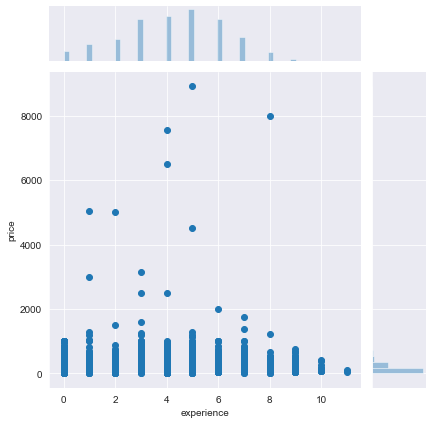

In [119]:
df3["experience"] = 2019 - df3["year"]
sns.jointplot(x = "experience", y = "price", data = df3)

In [35]:
# try it with log price
df3["log_price"] = np.log(df3["price"])

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning:

divide by zero encountered in log



In [159]:
print(df3[["experience", "price"]].corr(), "\n")
print(df3[["experience", "log_price"]].corr())

            experience     price
experience    1.000000 -0.024241
price        -0.024241  1.000000 

            experience  log_price
experience    1.000000  -0.010441
log_price    -0.010441   1.000000


experience does not seem to correlate with price

### Distance (km) to downtown location vs price

In [29]:
# central location convert to radians - from wikipedia
center_lat = 52.3658 * np.pi / 180 
center_lon = 4.8850 * np.pi / 180

def dist_from_center(lat, lon, center_lat, center_lon, r=6371):
    '''Calculate distance in km based on latitude and longitude'''
    lat = lat * np.pi / 180
    lon = lon * np.pi / 180
    cos_center_lat = np.cos(center_lat)
    cos_lat = np.cos(lat)
    cos_lat_d = np.cos(lat - center_lat)
    cos_lon_d = np.cos(lon - center_lon)
    return r * np.arccos(cos_lat_d - cos_center_lat * cos_lat * (1 - cos_lon_d))

In [30]:
df3["relative_distance"] = dist_from_center(df["latitude"], df["longitude"], center_lat = center_lat, center_lon = center_lon)

In [31]:
df3["relative_distance"].describe()

count    20677.000000
mean         2.561902
std          1.675757
min          0.026412
25%          1.459449
50%          2.176585
75%          3.086547
max         11.298134
Name: relative_distance, dtype: float64

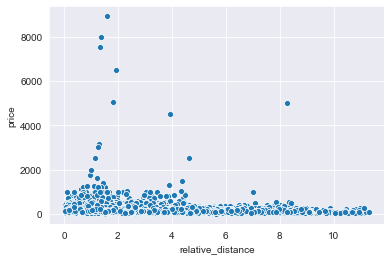

In [120]:
sns.scatterplot(x="relative_distance", y="price", data = df3)

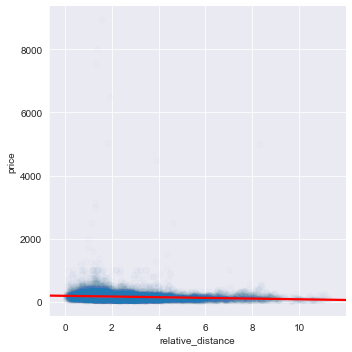

In [121]:
# the more zoomed-in, the clearer the trend, since the outliers in price are tossed out
sns.lmplot(x="relative_distance", y="price", data = df3, scatter_kws=dict(alpha = 0.01),
          line_kws=dict(color = "red"))

(0, 500)

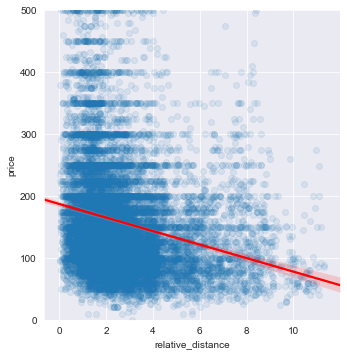

In [122]:
# the more zoomed-in, the clearer the trend, since the outliers in price are tossed out
sns.lmplot(x="relative_distance", y="price", data = df3, scatter_kws=dict(alpha = 0.1),
          line_kws=dict(color = "red"))
plt.ylim([0,500])

A clear negative slope, but the relationship does not look super linear just by the look of the points

(0, 9.09549053029724)

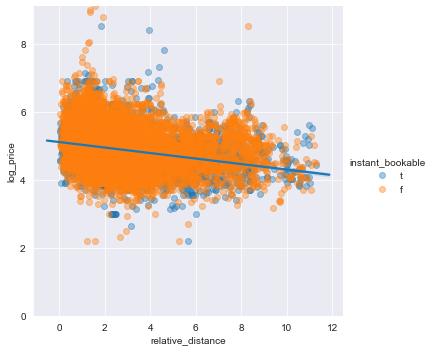

In [123]:
sns.lmplot(x="relative_distance", y="log_price", data = df3, scatter_kws=dict(alpha = 0.4), hue = "instant_bookable")
plt.ylim([0,df3["log_price"].max()])

In [37]:
df3[["relative_distance", "price"]].corr()

,relative_distance,price
relative_distance,1.000000,-0.112718
price,-0.112718,1.000000


In [38]:
df3[["relative_distance", "log_price"]].corr()

,relative_distance,log_price
relative_distance,1.000000,-0.229648
log_price,-0.229648,1.000000


(0, 500)

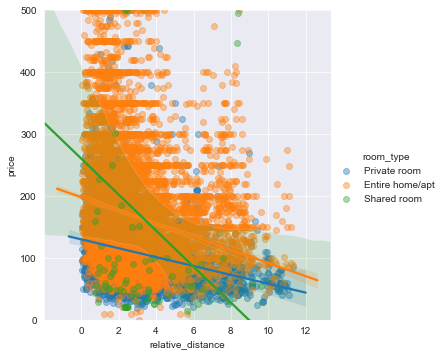

In [124]:
# the more zoomed-in, the clearer the trend, since the outliers in price are tossed out
sns.lmplot(x="relative_distance", y="price", data = df3, scatter_kws=dict(alpha = 0.4),
          hue = "room_type")
plt.ylim([0,500])

(0, 9.09549053029724)

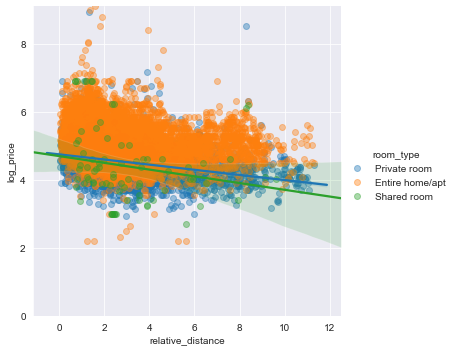

In [125]:
sns.lmplot(x="relative_distance", y="log_price", data = df3, scatter_kws=dict(alpha = 0.4), hue = "room_type")
plt.ylim([0,df3["log_price"].max()])

Entire hoom/apt is on average more expensive compared to private room which makes sense

There is a lot of noise for shared room in this plot, possibly due to low small sample of this category

In [41]:
df["room_type"].value_counts()

Entire home/apt    16402
Private room        4194
Shared room           81
Name: room_type, dtype: int64

(0, 500)

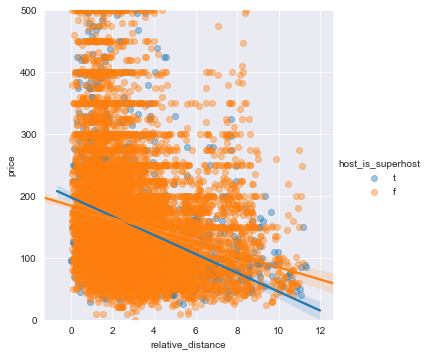

In [126]:
sns.lmplot(x="relative_distance", y="price", data = df3, scatter_kws=dict(alpha = 0.4),
          hue = "host_is_superhost")
plt.ylim([0,500])

Superhosts seems to be more expensive when they are closer to the city center, indicating their competiveness in the market, but it is unclear whether the difference is significant

Far off the city center, they also seem to make the listings cheaper, maybe that is how they gain their popularity and become superhosts

(0, 9.09549053029724)

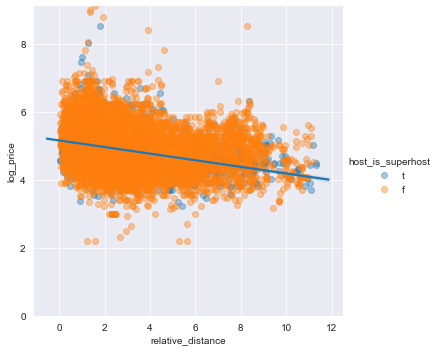

In [127]:
sns.lmplot(x="relative_distance", y="log_price", data = df3, scatter_kws=dict(alpha = 0.4), hue = "host_is_superhost")
plt.ylim([0,df3["log_price"].max()])

Effect on super host seems to disappear (not on a visually noticeable scale) on logscale

(0, 500)

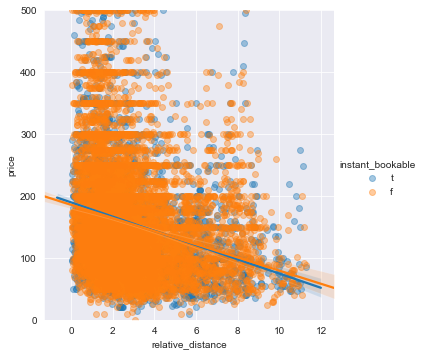

In [128]:
sns.lmplot(x="relative_distance", y="price", data = df3, scatter_kws=dict(alpha = 0.4),
          hue = "instant_bookable")
plt.ylim([0,500])

(0, 9.09549053029724)

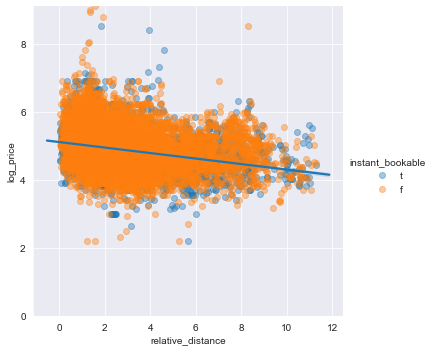

In [129]:
sns.lmplot(x="relative_distance", y="log_price", data = df3, scatter_kws=dict(alpha = 0.4),
          hue = "instant_bookable")
plt.ylim([0,df3["log_price"].max()])

Status of instant-bookable does not seem to affect the pricing

### Reviews and price

In [46]:
df3_col = list(df3.columns)

review_col = [x for x in df3_col if "review" in x]

In [47]:
review_col.append("price")
review_and_price = df3[review_col]
review_and_price.head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,267,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.12,59.0
1,283,88.0,9.0,10.0,10.0,10.0,10.0,9.0,2.46,80.0
2,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.16,125.0
3,195,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.11,150.0
4,283,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.59,75.0


C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



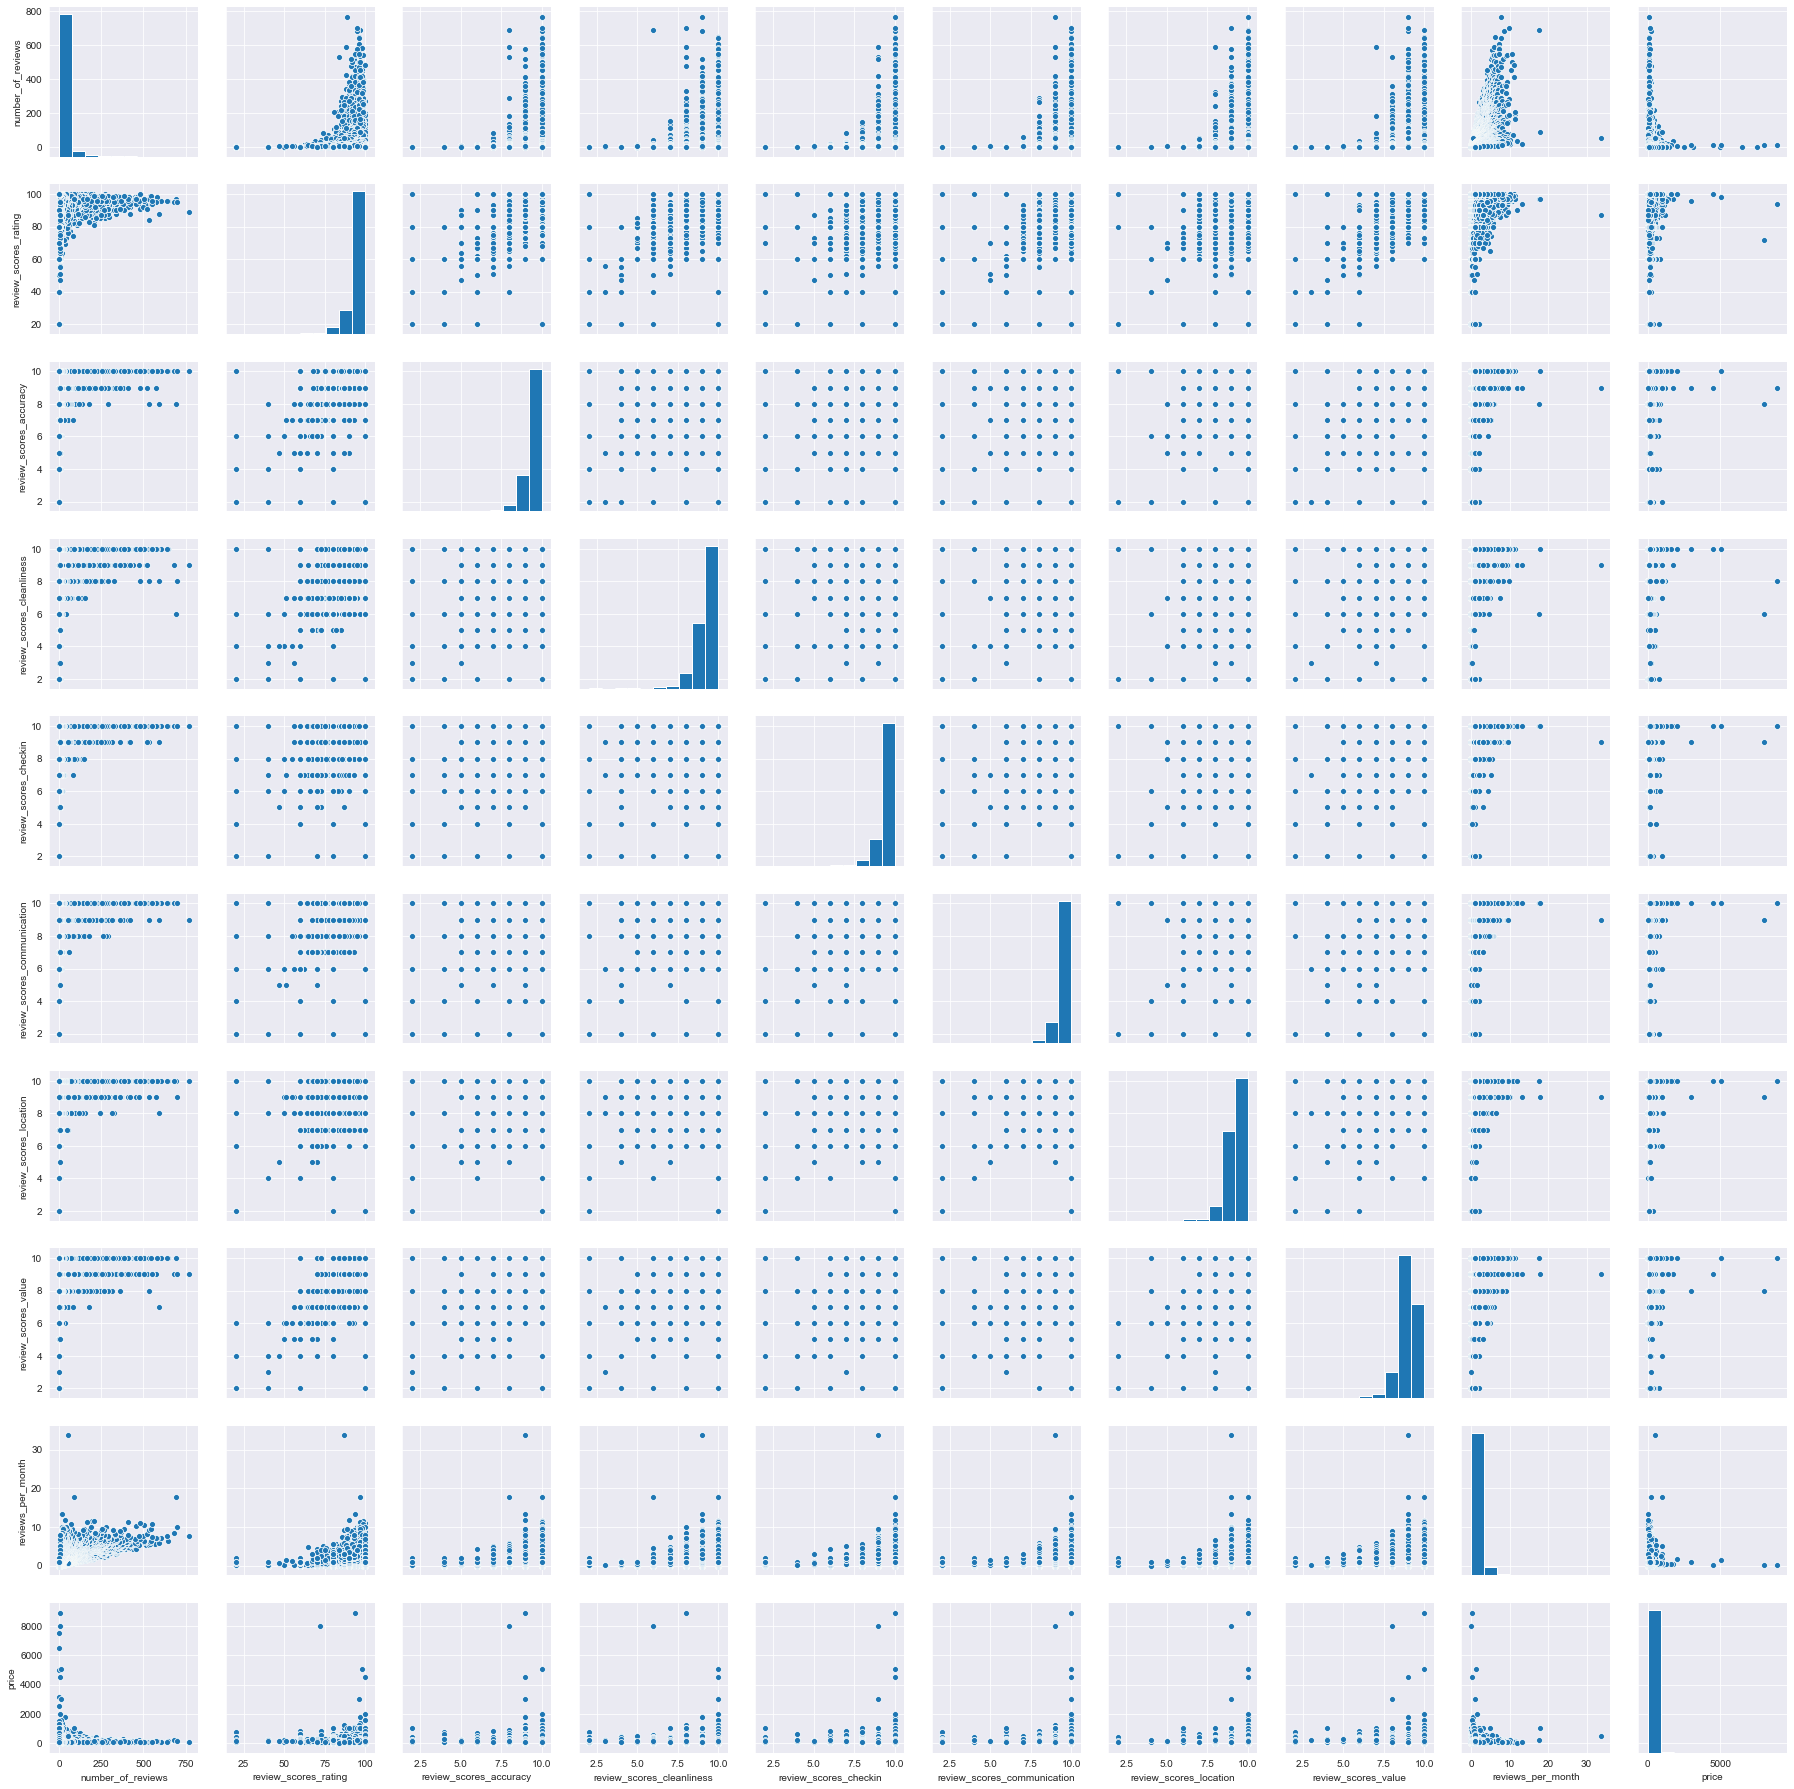

In [130]:
sns.pairplot(review_and_price)

seeing a lot of trends but not all of them seems to be linear and some of them are very vague 

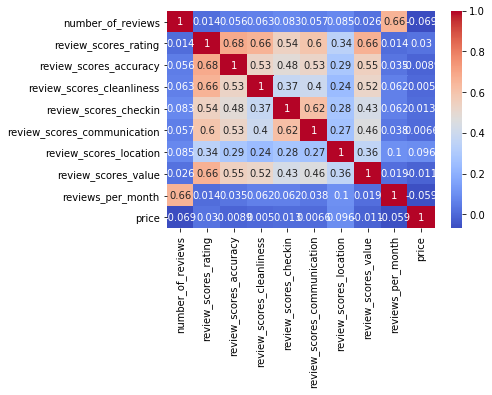

In [49]:
sns.heatmap(review_and_price.corr(), cmap = "coolwarm", annot = True)

Nothing seems to be higly correlated with price in a strict linear sense, but there still can be non-linear trends, also outliers can be having undue effects on the correlations

Now see it on log-scale

In [50]:
# see it on logscale
review_col.pop()
review_col.append("log_price")

rv_and_lp = df3[review_col]
rv_and_lp.head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,log_price
0,267,98.0,10.0,10.0,10.0,10.0,10.0,10.0,2.12,4.077537
1,283,88.0,9.0,10.0,10.0,10.0,10.0,9.0,2.46,4.382027
2,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.16,4.828314
3,195,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.11,5.010635
4,283,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.59,4.317488


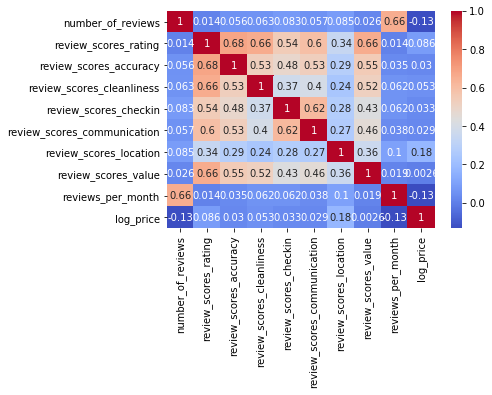

In [51]:
sns.heatmap(rv_and_lp.corr(), cmap = "coolwarm", annot = True)

Some correlations seem to be stronger but most of them are still very weak, a log transformation do not strengthen linear relationship everywhere

Also review items seem to correlate, in some cases, strongly, having an pearson coefficient above 0.6. This is an indication of **multi-collinearity**, it might distort the variables importance/significance in machine learning models, **making interpretations incorrect**

**zoom in**

(0, 2000)

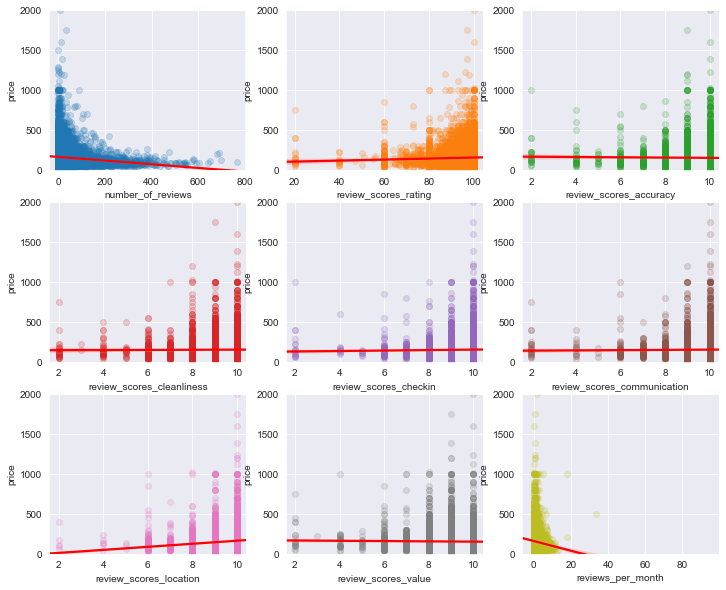

In [131]:
fig, ax = plt.subplots(3,3,figsize=(12,10))

sns.regplot(x = "number_of_reviews", y = "price", data = df3, ax = ax[0,0], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[0,0].set_ylim([0,2000])

sns.regplot(x = "review_scores_rating", y = "price", data = df3, ax = ax[0,1], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[0,1].set_ylim([0,2000])

sns.regplot(x = "review_scores_accuracy", y = "price", data = df3, ax = ax[0,2], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[0,2].set_ylim([0,2000])

sns.regplot(x = "review_scores_cleanliness", y = "price", data = df3, ax = ax[1,0], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[1,0].set_ylim([0,2000])

sns.regplot(x = "review_scores_checkin", y = "price", data = df3, ax = ax[1,1], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[1,1].set_ylim([0,2000])

sns.regplot(x = "review_scores_communication", y = "price", data = df3, ax = ax[1,2], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[1,2].set_ylim([0,2000])

sns.regplot(x = "review_scores_location", y = "price", data = df3, ax = ax[2,0], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[2,0].set_ylim([0,2000])

sns.regplot(x = "review_scores_value", y = "price", data = df3, ax = ax[2,1], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[2,1].set_ylim([0,2000])

sns.regplot(x = "reviews_per_month", y = "price", data = df3, ax = ax[2,2], fit_reg=True, 
            line_kws=dict(color="red"), scatter_kws=dict(alpha = 0.2))
ax[2,2].set_ylim([0,2000])

* number_of_reviews and reviews_per_month are negatively correlated with price, but they capture very similar information  
* review_score_location seems to correlate positively with price, but it might be capaturing similar information as "relative_distance"
* but some trends may not be linear, for starter, number_of_reviews does not seem to show a linear trend

### **Hosting listings count** & price

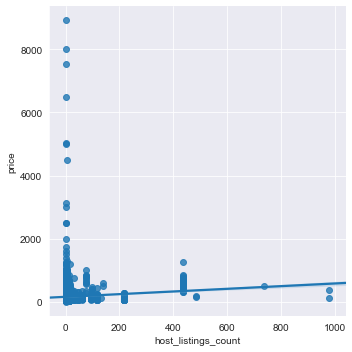

In [132]:
sns.lmplot(x="host_listings_count", y ="price", data = df3)

In [54]:
df3[["host_listings_count", "log_price"]].corr()

,host_listings_count,log_price
host_listings_count,1.000000,0.114313
log_price,0.114313,1.000000


Seems to correlate weakly on log-scale of price

### **Host response time** & price

(*note: barplots are aggregated as averages*)

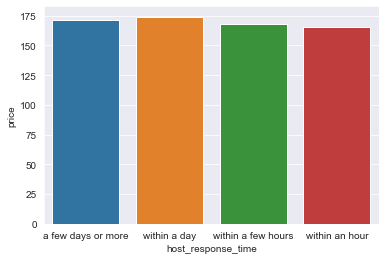

In [133]:
to_plot = df3[["host_response_time", "price"]].groupby("host_response_time").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

no obvious difference

### **Super-host** & price

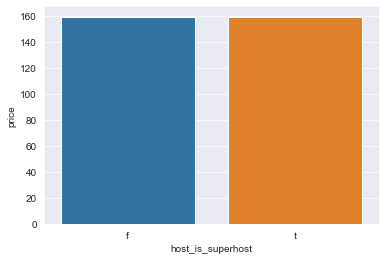

In [134]:
to_plot = df3[["host_is_superhost", "price"]].groupby("host_is_superhost").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

No difference

### Top 10 neighbourhoods by price

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

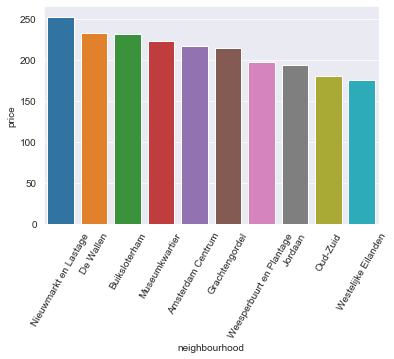

In [135]:
to_plot = df3[["neighbourhood", "price"]].groupby("neighbourhood").mean()
to_plot = to_plot.sort_values(by = "price", ascending = False)[0:10]
sns.barplot(x = to_plot.index, y="price", data = to_plot)
plt.xticks(rotation = 60)

**Cheapest Neighbourhoods by price**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

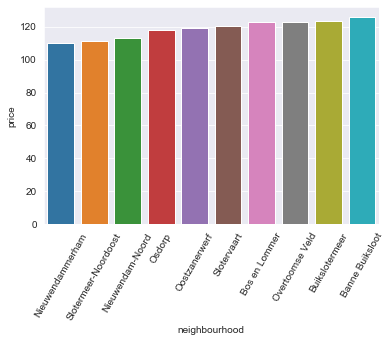

In [136]:
to_plot = df3[["neighbourhood", "price"]].groupby("neighbourhood").mean()
to_plot = to_plot.sort_values(by = "price", ascending = True)[0:10]
sns.barplot(x = to_plot.index, y="price", data = to_plot)
plt.xticks(rotation = 60)

There is a relationship between neighborhood and pricing. Depending on the neighbourhood, avergae pricing ranges from roughly $100 to $250

The take-away is neighborhoods matter, so it can be a useful predictive model

### **Top 10 property types by price**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

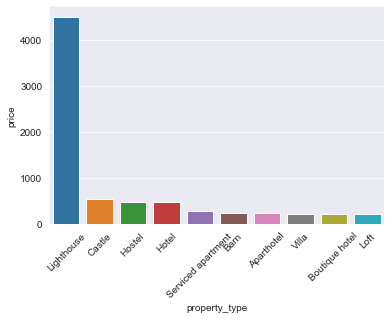

In [137]:
to_plot = df3[["property_type", "price"]].groupby("property_type").mean()
to_plot = to_plot.sort_values(by = "price", ascending = False)[0:10]
sns.barplot(x = to_plot.index, y="price", data = to_plot)
plt.xticks(rotation = 45)

Lighthouse is for rich people I guess? but is it even comfortable to live in tho

Try to see the difference **without the lighthouse**:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

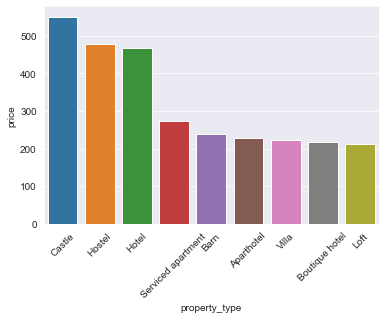

In [138]:
to_plot = df3[["property_type", "price"]].groupby("property_type").mean()
to_plot = to_plot.sort_values(by = "price", ascending = False)[1:10]
sns.barplot(x = to_plot.index, y="price", data = to_plot)
plt.xticks(rotation = 45)

Hostels are surprisingly expensive considering they are usually very affordable options

In fact, based on [hostelworld.com (filtered to Amsterdam)](https://www.hostelworld.com/hostels/Amsterdam?source=adwordsenUSCAtopdest&network=g&campaign=67903940&creative=237727871434&adposition=1t1&uniqueclickID=8156543561549309901&sub_keyword=amsterdam%20hostels&sub_ad=e&sub_publisher=ADW&gclid=Cj0KCQiAgebwBRDnARIsAE3eZjQpzb93Eq1vILwP3q3ZDDNhBdQBEZvz7QJJGc28_RUnwYbqTbUhBU8aAqU5EALw_wcB&gclsrc=aw.ds), the prices are pretty low, maybe hostels are only evaluated as whole house/apartment on airbnb?

In [89]:
df3.loc[df3["property_type"]=="Hostel", "room_type"].value_counts()

Shared room     17
Private room    12
Name: room_type, dtype: int64

In fact, that is not the case. Even on [airbnb (filtered to hostel)](https://www.airbnb.com/s/Amsterdam--Netherlands/homes?source=mc_search_bar&refinement_paths%5B%5D=%2Fhomes&place_id=ChIJVXealLU_xkcRja_At0z9AGY&checkin=2020-01-30&checkout=2020-01-31&adults=1&property_type_id%5B%5D=45&search_type=filter_change), that is barely the case... if you set the maximum price as $300, you will barely find any hostel, when I tried, I found none

**Therefore pricing on hostels might be inaccurate, consider dropping them to see if a better machine learning model can be built**

**Now let's see the 10 cheapest property**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

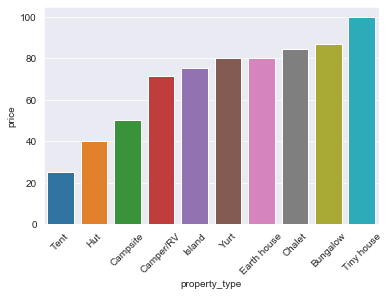

In [139]:
to_plot = df3[["property_type", "price"]].groupby("property_type").mean()
to_plot = to_plot.sort_values(by = "price", ascending = True)[0:10]
sns.barplot(x = to_plot.index, y="price", data = to_plot)
plt.xticks(rotation = 45)

Seems like property type capture a wide range of price, it can be a useful predictors

**Host identity verified?**

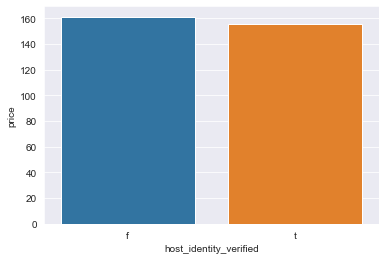

In [140]:
to_plot = df3[["host_identity_verified", "price"]].groupby("host_identity_verified").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

Tiny difference

### **Room Type**

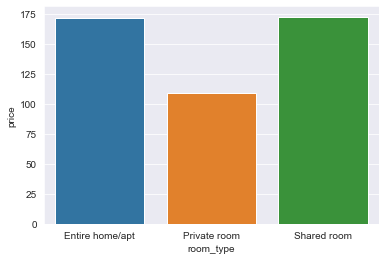

In [141]:
to_plot = df3[["room_type", "price"]].groupby("room_type").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

Entire home/apt more expensive than private room, this makes sense

But shared room also? **Maybe a room is made shared due to high demands in certain season or certain location? And due to this high demand, these room were priced high?**

### Amount of people to accommodate vs price

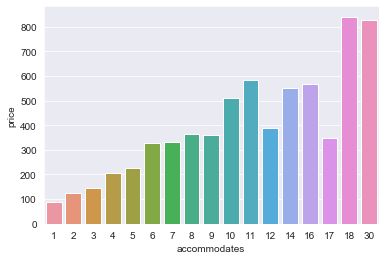

In [142]:
to_plot = df3[["accommodates", "price"]].groupby("accommodates").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

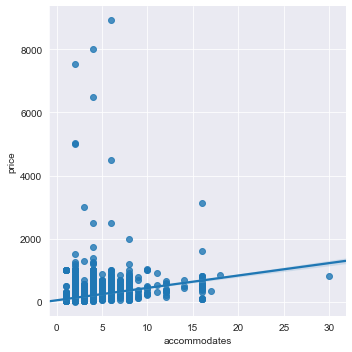

In [143]:
sns.lmplot(x="accommodates", y="price", data=df3)

In [93]:
print(df3[["accommodates","price"]].corr(), "\n")
print(df3[["accommodates","log_price"]].corr())

              accommodates    price
accommodates       1.00000  0.31807
price              0.31807  1.00000 

              accommodates  log_price
accommodates       1.00000    0.50157
log_price          0.50157    1.00000


The more to accommodate, the higher the price (overall), makes sense
Also correlation is stronger on log-scale.

### Amount of bathrooms vs price

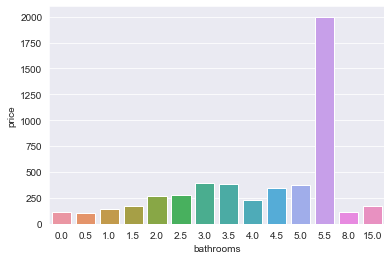

In [144]:
to_plot = df3[["bathrooms", "price"]].groupby("bathrooms").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

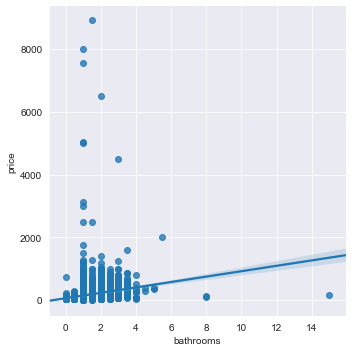

In [145]:
sns.lmplot(x="bathrooms", y="price", data=df3)

In [96]:
print(df3[["bathrooms","price"]].corr(), "\n")
print(df3[["bathrooms","log_price"]].corr())

           bathrooms     price
bathrooms   1.000000  0.201558
price       0.201558  1.000000 

           bathrooms  log_price
bathrooms   1.000000   0.281273
log_price   0.281273   1.000000


Again, weak correlation but stronger on logscale 

### Amount of bedrooms vs price

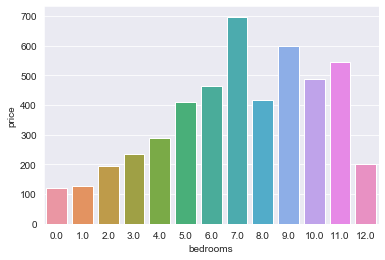

In [146]:
to_plot = df3[["bedrooms", "price"]].groupby("bedrooms").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

Ascend from 1 through 7, after that, does not seem to follow an obvious trend

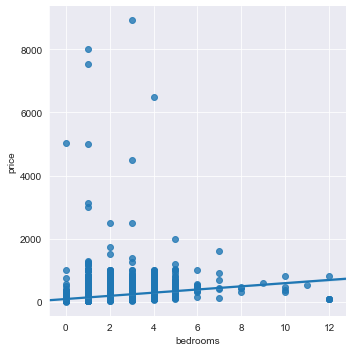

In [147]:
sns.lmplot(x="bedrooms", y="price", data = df3)

In [99]:
print(df3[["bedrooms","price"]].corr(), "\n")
print(df3[["bedrooms","log_price"]].corr())

          bedrooms     price
bedrooms  1.000000  0.277833
price     0.277833  1.000000 

           bedrooms  log_price
bedrooms   1.000000   0.453087
log_price  0.453087   1.000000


### Amount of beds vs price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

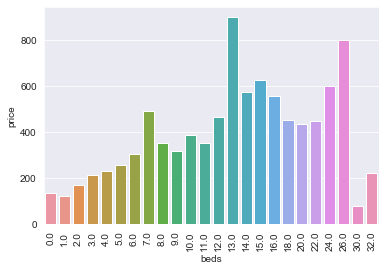

In [148]:
to_plot = df3[["beds", "price"]].groupby("beds").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)
plt.xticks(rotation = 90)

overall, it looks like some increasing trend

but it dips sharply at 30.0, maybe those are hostels?

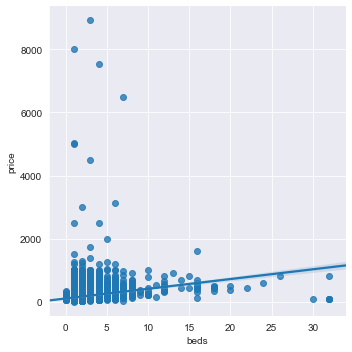

In [149]:
sns.lmplot(x="beds", y="price", data = df3)

In [101]:
print(df3[["beds","price"]].corr(), "\n")
print(df3[["beds","log_price"]].corr())

           beds     price
beds   1.000000  0.267178
price  0.267178  1.000000 

               beds  log_price
beds       1.000000   0.404855
log_price  0.404855   1.000000


A moderate correlation on log scale of price

### Bed type vs price

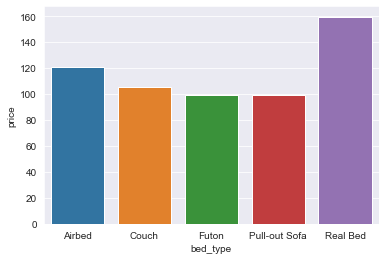

In [150]:
to_plot = df3[["bed_type", "price"]].groupby("bed_type").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

Real bed is most expensive, following is airbed

### Amount of guests included vs price

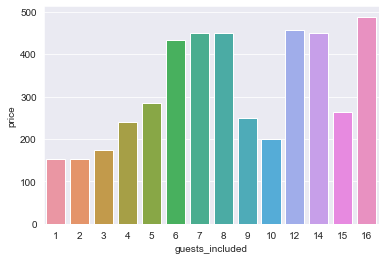

In [151]:
to_plot = df3[["guests_included", "price"]].groupby("guests_included").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

No clear trend here

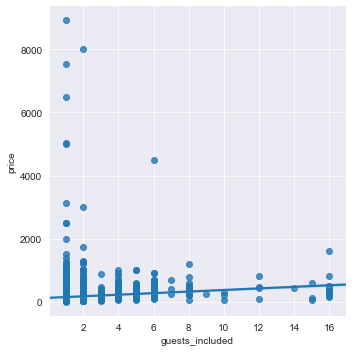

In [152]:
sns.lmplot(x="guests_included", y ="price", data = df3)

In [103]:
print(df3[["guests_included","price"]].corr(), "\n")
print(df3[["guests_included","log_price"]].corr())

                 guests_included     price
guests_included         1.000000  0.144031
price                   0.144031  1.000000 

                 guests_included  log_price
guests_included         1.000000   0.235804
log_price               0.235804   1.000000


Weak correlation but stronger on log scale

### Minimum_nights vs price

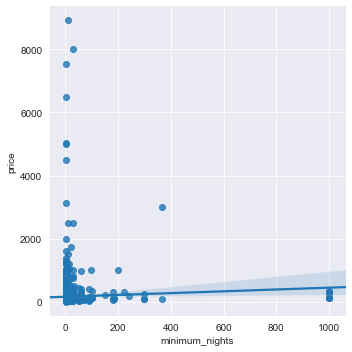

In [153]:
sns.lmplot(x="minimum_nights", y="price", data = df3)

In [105]:
print(df3[["minimum_nights","price"]].corr(), "\n")
print(df3[["minimum_nights","log_price"]].corr())

                minimum_nights     price
minimum_nights        1.000000  0.033117
price                 0.033117  1.000000 

                minimum_nights  log_price
minimum_nights         1.00000    0.02051
log_price              0.02051    1.00000


No correlation

### Maximum nights vs price

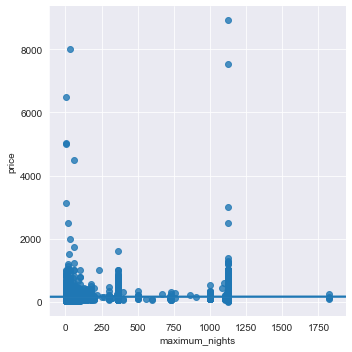

In [154]:
sns.lmplot(x="maximum_nights", y="price", data = df3)

In [106]:
print(df3[["maximum_nights","price"]].corr(), "\n")
print(df3[["maximum_nights","log_price"]].corr())

                maximum_nights     price
maximum_nights        1.000000  0.006098
price                 0.006098  1.000000 

                maximum_nights  log_price
maximum_nights         1.00000    0.02473
log_price              0.02473    1.00000


No correlation

### Annual availability vs price

(*availability indicates how popular a place is, well, too some extent*)

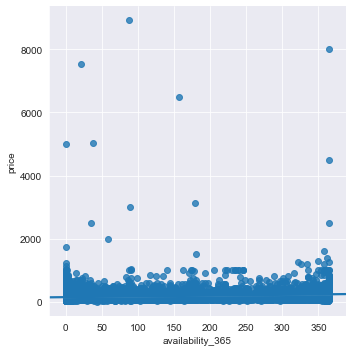

In [155]:
sns.lmplot(x="availability_365", y="price", data = df3)

In [108]:
print(df3[["availability_365","price"]].corr(), "\n")
print(df3[["availability_365","log_price"]].corr())

                  availability_365     price
availability_365          1.000000  0.153069
price                     0.153069  1.000000 

                  availability_365  log_price
availability_365          1.000000   0.173806
log_price                 0.173806   1.000000


Weak correlation but stronger on log price, expensive listings are less desired, thus having more availabilities

### Instant bookable and price

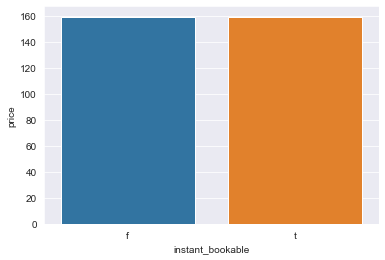

In [156]:
to_plot = df3[["instant_bookable", "price"]].groupby("instant_bookable").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)

no difference

### Cancellation policy and price

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

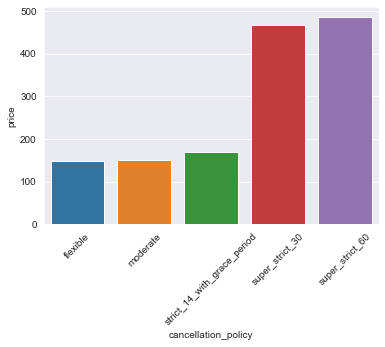

In [157]:
to_plot = df3[["cancellation_policy", "price"]].groupby("cancellation_policy").mean()
sns.barplot(x = to_plot.index, y="price", data = to_plot)
plt.xticks(rotation=45)

The more strict the policy, the more expensive... well if you are about to make a lot of money you are not gonna easily let it slip away

Also, maybe it takes more work to prepare an expensive place, so hosts don't want their efforts to go to waste

In [85]:
df3.columns

Index(['host_since', 'host_response_time', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month', 'year', 'experience', 'relative_distance',
       'log_price'],
      dtype='object')

In [179]:
df3.shape[1]

39

## Some Simple Analytic Proposals:
(Some based on EDA, some just comes to mind)

- **Neighbourhood** - what do the expensive neighbourhoods have in common, what made them competitive?
    - It is food/restaurants? Is it sights? Closeness to sports facilities? Distance to downtown area?
    
- Does closeness to bodies of water, such as Amstel river, correlate with pricing?
  
- Holding other factors fixed, the higher the price, the less likely a listing is competitive in the market, thus higher availability (less people willing to pay that). Holding other factors fixed, is it plausible to come up with a **tradeoff between price and availability that can maximize potential income?**
    - This could be another machine learning case, or an interesting case of optimization analysis (figuring out a system to price listings for maximum gain)

- When investigating association between property types and pricing, it was suspected that the **pricing of hostels might be inaccurate data**, further investigation (such as contacting airbnb) is required to validate this suspicion... but the pricing seen in this data set on hostels indeed exceeds common sense

- Since the data has large variable ranges, a deeper dive outlier analysis may be useful for optimizing machine learning models
    - dropping observations or modifying weights 

- Also, some categorical data variables are very un-balanced across different levels, weight adjusting could be useful as well

- Some columns have very good potential for natural language processing, text analysis and sentiment analysis since they hold text information
    - "name", "summary", "neighborhood_overview", "notes", "transit", "access", "interaction", "house_rules", "host_about", "amenities", "description", "space"
    - Such analysis can lead to generation of informative features, for example, analysis of how having TV, WIFI, Air conditioning, garden, backyard, pool, breakfast or allowing pets, smoking or other activities will affect pricing, availability and review scores


## Machine Learning:

**Based on EDA, variables are selected based on their correlation/association (some visually, some numerically) with price**

In [236]:
# based on EDA, variables that capture information regarding price
X_cols = ["relative_distance", "host_listings_count","neighbourhood", "property_type", "room_type", "accommodates",
    "bathrooms", "bedrooms", "beds", "bed_type", "guests_included", "availability_365", "cancellation_policy"]

X_cols.extend(review_col) 
# reviews items highly correlated, but funcamentally they are designed to capture more or less different features

len(X_cols)

22

**Selecting a model**:

1. outliers
    - There are some clearer outliers on the price variables, also outliers on predictors are not yet analyzied, so a baseline model that is less sensitive to outliers will be a reasonable choice
2. non-linear
    - Most correlation with price are stronger on the log-scale price - indicating non-linear relationships on multiple levels, plus even on log-scale most correlations are still weak... therefore, a more flexible model that rely less on linking the outcome variable with algebraic expressions will be wiser 
3. categorical features
    - Some of them do differntiate price very well, so models that rely strictly on numeric variables are not considered (e.g. knn regression)

Based on the above rationales and criterias, **Random Forest** regressor seems like a reasonable choice.

- I choose simple validation over cross validation for the modeling, since the data set is not very small, cross-validation can take a long time


### Imputation

Filling missing values: 
- Numeric variables:fill with **median**
- Categorical variables:fill with new level: **"unknown"**

(20677, 23)


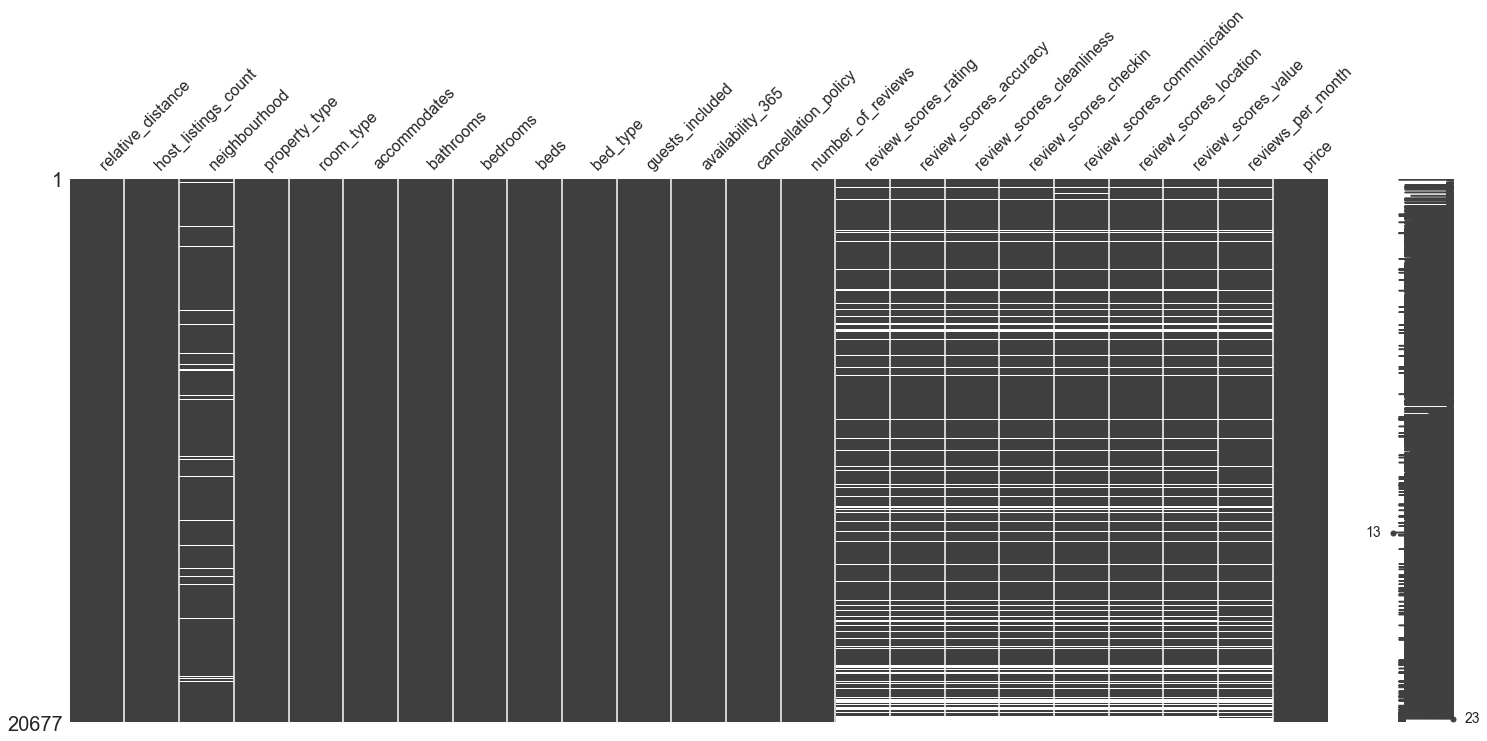

In [237]:
# look at missing values with selected variables again
df4 = df3[X_cols]
df4["price"] = df3["price"]
print(df4.shape)
mn.matrix(df4)

In [2]:
# df4.isnull().sum(axis = 0)

In [238]:
X_cat = ["neighbourhood", "cancellation_policy"] # categorical columns with missing values
X_num = ["host_listings_count", "bathrooms", "bedrooms", "beds", "review_scores_rating", "review_scores_accuracy",
        "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location",
        "review_scores_value", "reviews_per_month"]

# fill_data
def fill_data(columns, value):
    if value != "median":
        for item in columns:
            df4[item].fillna(value = value, inplace = True)
    elif value == "median":
        for item in columns:
            df4[item].fillna(value = df4[item].median(), inplace = True)

fill_data(X_cat, value = "unknown")
fill_data(X_num, value = "median")

In [1]:
# df4.info()

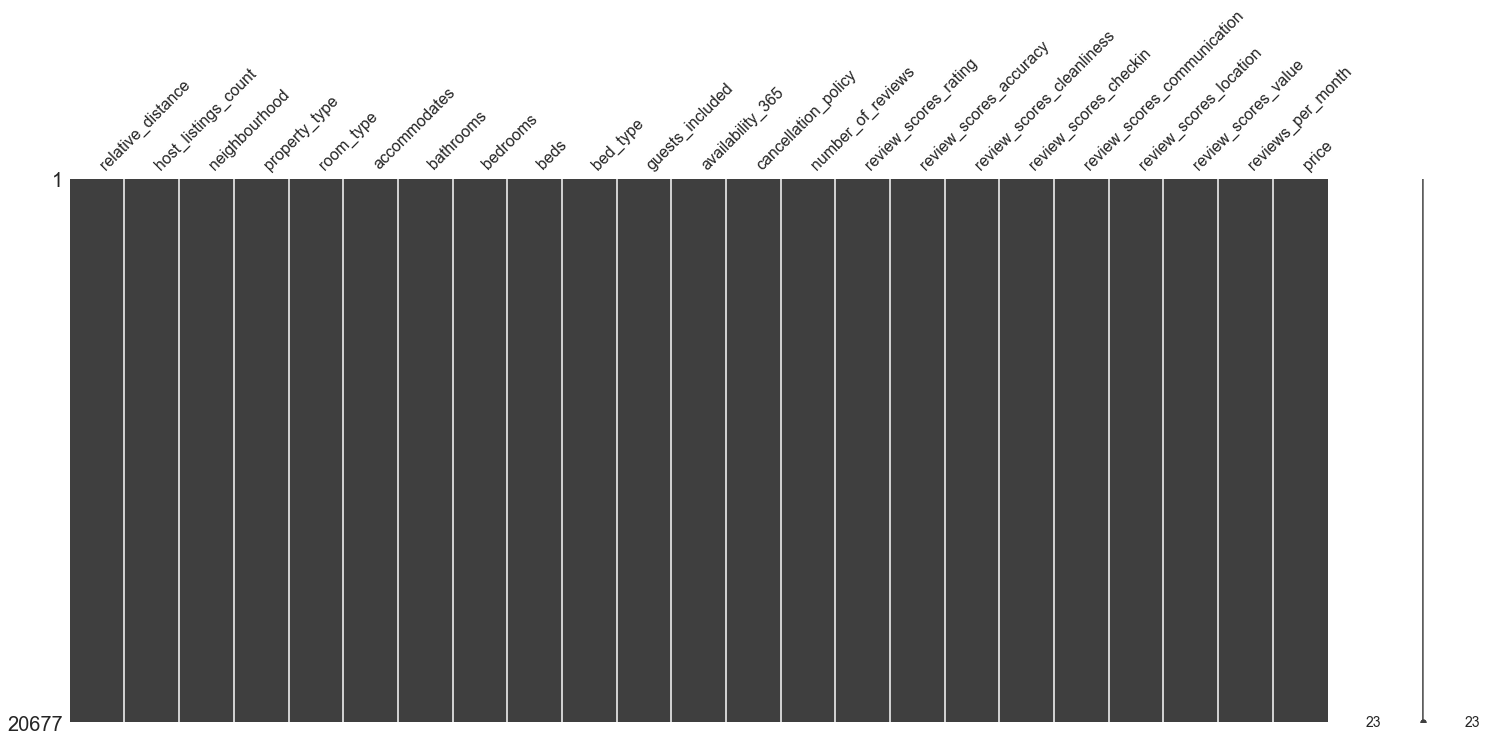

In [240]:
mn.matrix(df4)

### Baseline model

**Split data**

In [241]:
from sklearn.model_selection import train_test_split
X = df4[X_cols]
y = df4["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [8]:
# df4.info()

In [287]:
# before splitting, encode categorical variables
# use label encoding
X_cols = ["neighbourhood", "property_type", "room_type", "bed_type","cancellation_policy"]
X_all = df4[X_cols].copy() # to deal with the problem of unseen labels in test data
label_X_train = X_train.copy()
label_X_test = X_test.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in X_cols:
    X_all[col] = label_encoder.fit_transform(X_all[col])
    label_X_train[col] = label_encoder.transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])

In [259]:
from sklearn.ensemble import RandomForestRegressor

In [260]:
model = RandomForestRegressor(random_state=0)

In [294]:
from sklearn.metrics import mean_squared_error
# evaluation model - using rmse
def evaluate(model, X_test = label_X_test, y_test = y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    print('RMSE of: ', errors)
    
    return errors

In [308]:
model_base = model.fit(label_X_train, y_train)

error_base = evaluate(model_base)

print("base error: ", str(error_base))

Model Performance
RMSE of:  192.38005013322896
base error:  192.38005013322896


OMG big error, estimated average error is $192.38

**Let's try removing some outliers on price, let's look at only under $500**

In [304]:
label_X_train_500under = label_X_train.loc[y_train <= 500] 
y_train_500under = y_train[y_train <=500]
label_X_test_500under = label_X_test[y_test <= 500]
y_test_500under = y_test[y_test<=500]

In [313]:
model_500under = model.fit(label_X_train_500under, y_train_500under)

error_base = evaluate(model_500under, X_test=label_X_test_500under, y_test=y_test_500under)

print("Error dropping outliers: ", str(error_base))

Model Performance
RMSE of:  54.61910992936803
Error dropping outliers:  54.61910992936803


Used to predict listings with price $500 or below, the predictions are much better

Let's compare with how base model perform on predicting listings under $500

In [312]:
evaluate(model_base, X_test=label_X_test_500under, y_test=y_test_500under)

Model Performance
RMSE of:  72.29833026521935


72.29833026521935

Model dropping outliers still win, now let's try predicting all y_test (including >$500) using this new model:

In [315]:
evaluate(model_500under, X_test=label_X_test, y_test=y_test)

Model Performance
RMSE of:  190.11591165682844


Still performing a little better, let's try to tune parameters on this new model

### Hyper Parameter Tuning

In [317]:
# default hyperparameters
hyperparameters = model.get_params()
print(hyperparameters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Let's try to tune these parameters:
- n_estimators = number of trees in the foreset
- max_features = maximum number of features for each split
- max_depth = maximum number of levels in each decision tree
- min_samples_split = minimum number of data points used for each split
- min_samples_leaf = minimum number of data points allowed in a leaf node

In [331]:
# set up parameter matrix/grid

# n_estimators: let's use to to 5% of the data
ten_per = int(df4.shape[0]/10)
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 1000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 10, 15]

# max_depth
max_depth = [int(x) for x in np.linspace(0, 30, num = 3)]

# min_samples_split
min_samples_split = [5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              "bootstrap":bootstrap}

random_grid

{'n_estimators': [150, 362, 575, 787, 1000],
 'max_features': ['auto', 'sqrt', 10, 15],
 'max_depth': [0, 15, 30],
 'min_samples_split': [5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10],
 'bootstrap': [True, False]}

Didn't want to get too ambitious and crash my computer

In [332]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor(random_state=0)
# 3-fold cv
model_rsv = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, 
                               random_state=0, n_jobs = 1) 

In [9]:
# fit the model - use data after dropping outliers
fit_model_rsv = model_rsv.fit(label_X_train_500under, y_train_500under)

**Let's have some deserts while waiting, home-made ice-cream:)**

Took 35 minutes ouch, maybe I got too ambitious

In [346]:
# let's see how this "best" model will perform
fit_model_rsv.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [353]:
best_fit = fit_model_rsv.best_estimator_

In [344]:
evaluate(best_fit, X_test=label_X_test_500under, y_test=y_test_500under)

Model Performance
RMSE of:  53.6701774636601


53.6701774636601

Very slight improvement on rmse, but since the lowest n_estimators and lowest mean sample split produce the best results, maybe we can try it in that direction

In [14]:
random_grid = {'n_estimators': [20,40,50,80,100,125,150],
              'max_features': ["sqrt"],
              'max_depth': [15],
              'min_samples_split': [1,2,3,4,5],
              'min_samples_leaf': [2],
              "bootstrap":[False]}

model_rsv2 = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, 
                               #random_state=0, n_jobs = 1) 

fit_model_rsv2 = model_rsv2.fit(label_X_train_500under, y_train_500under)

In [358]:
fit_model_rsv2.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

Well seems like things didn't change

In [354]:
best_fit2 = fit_model_rsv2.best_estimator_

In [359]:
evaluate(best_fit2, X_test=label_X_test_500under, y_test=y_test_500under)

Model Performance
RMSE of:  53.6701774636601


53.6701774636601

Let's see how well does it perform on data with the outliers

In [361]:
evaluate(best_fit2, X_test=label_X_test, y_test=y_test)

Model Performance
RMSE of:  190.75329414810577


190.75329414810577

Still terrible, ouch...

### Another tree-based model - XGBoost (extreme gradient boosting)

In [368]:
from xgboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(label_X_train_500under, y_train_500under)

[18:56:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Let's see how well does it do with data where prices < 500 

In [371]:
evaluate(XGB, label_X_test_500under, y_test_500under)

Model Performance
RMSE of:  53.77426632491711


53.77426632491711

Now let's see how well does it do with data where prices > 500

In [372]:
evaluate(XGB, label_X_test, y_test)

Model Performance
RMSE of:  190.0020059025557


190.0020059025557

Um performance similar to the "best" random forest regressor

### Let's do some parameter tuning

In [379]:
XGB2 = XGBRegressor(n_estimators=100)
XGB2.fit(label_X_train_500under, y_train_500under)
evaluate(XGB, label_X_test_500under, y_test_500under)

C:\Users\Dell\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[19:03:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Performance
RMSE of:  53.77426632491711


53.77426632491711

In [380]:
XGB2 = XGBRegressor(n_estimators=1500, learning_rate=0.01)
XGB2.fit(label_X_train_500under, y_train_500under)
evaluate(XGB, label_X_test_500under, y_test_500under)

C:\Users\Dell\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[19:04:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Performance
RMSE of:  53.77426632491711


53.77426632491711

Changing n_estimators or learning rate do not seem to change a lot of RMSE, but let's still try to tune some parameters

In [384]:
XGB.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)>

In [386]:
param = dict(min_child_weight = [1,2,5,7,10],
             maxt_depth = [3,5,7,10],
             learning_rate = [0.01, 0.05, 0.1],
             n_estimators = [100,500,1000],
             gamma = [0,1,3,5,7],
             subsample = [0.5,0.7, 0.9,1],
             colsample_bytree = [0.5,0.7, 0.9,1]
            )

# got a bit ambitious since XGBRegressor uses

In [15]:
# set up the search methods
XGB = XGBRegressor(n_jobs = 4)
XGB_rsv = RandomizedSearchCV(estimator = XGB, param_distributions = param, n_iter = 100, cv = 3, verbose=0, 
 #                              random_state=0) 
XGB_rsv.fit(label_X_train_500under, y_train_500under)

In [397]:
XGB_rsv.best_params_

{'subsample': 0.9,
 'n_estimators': 500,
 'min_child_weight': 1,
 'maxt_depth': 7,
 'learning_rate': 0.1,
 'gamma': 3,
 'colsample_bytree': 0.5}

Test on data where prices <500

In [396]:
evaluate(XGB_rsv.best_estimator_, label_X_test_500under, y_test_500under)

Model Performance
RMSE of:  52.16996555728812


52.16996555728812

A little bit better... 

Test on all data

In [399]:
evaluate(XGB_rsv.best_estimator_, label_X_test, y_test)

Model Performance
RMSE of:  188.8716254667796


188.8716254667796

In [ ]:
Also a little bit better

## Final thoughts on machine learning improvement 

* Like mentioned in the earlier section, perform text analysis on some variables that I haven't have time to look at, then generated some potentially useful features

* More feature engineering:
    - we generated relative distance based on the latitude and longitude, maybe we can create more?

* Keep tuning parameters?
    
* Try more models, maybe some deep learning, or other tree-based models